# ★ Solving Equations ★

# 1.1 The Bisection Method

## DEFINITION 1.1

The function $f(x)$ has a root at $x = r$ if $f(r) = 0$

## THEOREM 1.2

Let $f$ be a continuous function on $[a, b]$, satisfying $f(a)f(b) < 0$. Then $f$ has a root between $a$ and $b$, that is, that exists a number $r$ satisfying $a < r < b$ and $f(r) = 0$.

In [1]:
# Import modules
import traceback
import numpy as np
import scipy
import scipy.linalg as LA
import matplotlib.pyplot as plt
import sympy
import sympy.abc

from scipy import optimize
from IPython.display import display

# Initialize sympy
sympy.init_printing(use_unicode=True)

In [2]:
def bisect(f, a, b, tol):
    """
    Computes approximate solution of f(x)=0
    
    Arguments:
        f (function prototype) : function handle 
        a (real number) : left bound of the interval
        b (real number) : right bound of the interval
        tol (real number) : tolerance
        
    Returns:
        Approximate solution x
        
    Raises:
        ValueError:
            - a * b must be smaller than zero
            - a > b will be considered to be wrong
    """
    try:
        if a > b :
            raise ValueError('a must be <= b')
        
        fa = f(a)
        fb = f(b)
        
        if np.sign(fa) * np.sign(fb) >= 0 :
            raise ValueError('It must be verified that f(a) * f(b) < 0')
            
        while (b - a) / 2 > tol :
            # Find the intermediate point  
            c = (a + b) / 2
            fc = f(c)
            if fc == 0 :
                return c
            elif fa * fc < 0 :
                b = c
                fb = fc
            else :
                a = c
                fa = fc
                
        return (a + b) / 2
            
    except ValueError as e :
        print('ValueError Exception : ', e)
        traceback.print_exception()
    

### Example 

Find a root of $f(x) = x^3 + x - 1$ by using the Bisection Method on the interval $[0, 1]$.

In [3]:
root = scipy.optimize.bisect(lambda x : np.power(x, 3) + x - 1, 0, 1)
print('{:>.8f}'.format(root))

0.68232780


## Definition 1.3
A solution is correct within  $p$ decimal places if the error is less than $0.5 \times 10^{-p}$.

### Example

Use the Bisection Method to find a root of $f(x) = cosx - x$ in the interval $[0, 1]$ to within six correct places.

In [4]:
root = scipy.optimize.bisect(lambda x : np.cos(x) - x, 0, 1)
print('{:>.6f}'.format(root))

0.739085


1. Apply two steps of the Bisection Method on the interval $[1, 2]$ to find the approximate root of $f(x) = 2x^3 - x - 7$.

In [5]:
root = scipy.optimize.bisect(lambda x : 2 * np.power(x, 3) - x - 7, 1, 2)
print('{:>.6f}'.format(root))

1.627889


2. Use the ~bisect.m code~ (Bisection Method) to find the solution of $e^x = 3$ correct to six decimal places.

In [6]:
root = scipy.optimize.bisect(lambda x : np.exp(x) - 3, 1, 2)
print('{:>.6f}'.format(root))

1.098612


## 1.1 Computer Problems

1. Use the Bisection Method to ﬁnd the root to six correct decimal places.

(a) $x^3 = 9$

In [7]:
root = scipy.optimize.bisect(lambda x : np.power(x, 3) - 9, 2, 3)
print('{:>.6f}'.format(root))

2.080084


(b) $3x^3 + x^2 = x + 5$

In [8]:
root = scipy.optimize.bisect(lambda x : 3 * np.power(x, 3) + np.power(x, 2) - x - 5, 1, 2)
print('{:>.6f}'.format(root))

1.169726


(c) $\cos^2{x} + 6 = x$

In [9]:
root = scipy.optimize.bisect(lambda x : np.power(np.cos(x), 2) - x + 6, 0, 10)
print('{:>.6f}'.format(root))

6.776092


---
2. Use the Bisection Method to ﬁnd the root to eight correct decimal places.

(a) $x^5 + x = 1$

In [10]:
root = scipy.optimize.bisect(lambda x : np.power(x, 5) + x - 1, 0, 1)
print('{:>.8f}'.format(root))

0.75487767


(b) $sin{x} = 6x + 5$

In [11]:
root = scipy.optimize.bisect(lambda x : np.sin(x) - 6 * x - 5, -5, 5)
print('{:>.8f}'.format(root))

-0.97089892


(c) $ln{x} + x^2 = 3$

In [12]:
root = scipy.optimize.bisect(lambda x : np.log(x) + np.power(x, 2) - 3, 1, 2)
print('{:>.8f}'.format(root))

1.59214294


---
3. Use the Bisection Method to locate all solutions of the following equations. Sketch the function by using MATLAB’s plot command and identify three intervals of length one that contain a root. Then find the roots to six correct decimal places.

In [13]:
def myplot(xpts, ypts, title = '', xlabel = 'x', ylabel = 'y'):
    plt.plot(xpts, ypts, color='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axhline(0, color='black', linestyle=':', linewidth=1)
    plt.show()
    plt.close()

(a) $2x^3 - 6x - 1 = 0$

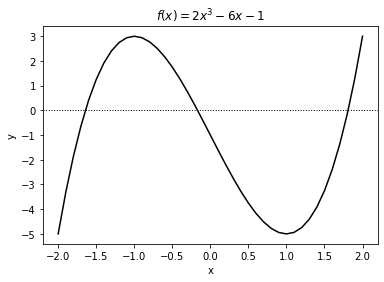

root = -1.641784
root = -0.168254
root = +1.810038


In [14]:
f = lambda x : 2 * np.power(x, 3) - 6 * x - 1
xpts = np.linspace(-2, 2, 41)
ypts = f(xpts)

myplot(xpts, ypts, '$f(x) = 2x^3 - 6x - 1$')
print('root = {:>+.6f}'.format(scipy.optimize.bisect(f, -2, -1)))
print('root = {:>+.6f}'.format(scipy.optimize.bisect(f, -0.5, 0)))
print('root = {:>+.6f}'.format(scipy.optimize.bisect(f, 1.5, 2)))

(b) $e^{x-2} + x^3 - x = 0$

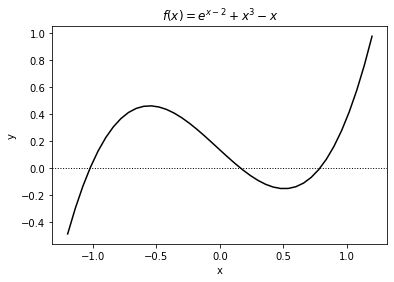

root = -1.023482
root = +0.163822
root = +0.788941


In [15]:
f = lambda x : np.exp(x - 2) + np.power(x, 3) - x
xpts = np.linspace(-1.2, 1.2, 41)
ypts = f(xpts)

myplot(xpts, ypts, '$f(x) = e^{x - 2} + x^3 - x$')
print('root = {:>+.6f}'.format(scipy.optimize.bisect(f, -1.5, -0.5)))
print('root = {:>+.6f}'.format(scipy.optimize.bisect(f, -0.5, 0.5)))
print('root = {:>+.6f}'.format(scipy.optimize.bisect(f, 0.5, 1.0)))

(c) $1 + 5x - 6x^3 - e^{2x} = 0$

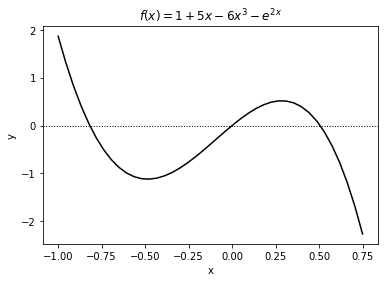

root = -0.818094
root = -0.000000
root = +0.506308


In [16]:
f = lambda x : 1 + 5 * x - 6 * np.power(x, 3) - np.exp(2 * x)
xpts = np.linspace(-1, 0.75, 41)
ypts = f(xpts)

myplot(xpts, ypts, '$f(x) = 1 + 5x - 6x^3 - e^{2x}$')
print('root = {:>+.6f}'.format(scipy.optimize.bisect(f, -1.0, -0.5)))
print('root = {:>+.6f}'.format(scipy.optimize.bisect(f, -0.5, 0.25)))
print('root = {:>+.6f}'.format(scipy.optimize.bisect(f, 0.25, 0.75)))

---
4. Calculate the square roots of the following numbers to eight correct decimal places by using the Bisection Method to solve $x^2 - A = 0$, where A is (a) 2 (b) 3 (c) 5. State your starting interval and the number of steps needed.

(a) $f(x) = x^2 - 2$

In [17]:
ranges = [1, 2]
f = lambda x : np.power(x, 2) - 2
root = scipy.optimize.bisect(f, *ranges)
print('x is {:>.8f} in {:}'.format(root, ranges))

x is 1.41421356 in [1, 2]


(b) $f(x) = x^2 - 3$

In [18]:
ranges = [1, 2]
f = lambda x : np.power(x, 2) - 3
root = scipy.optimize.bisect(f, *ranges)
print('x is {:>.8f} in {:}'.format(root, ranges))

x is 1.73205081 in [1, 2]


(c) $f(x) = x^2 - 5$

In [19]:
ranges = [2, 3]
f = lambda x : np.power(x, 2) - 5
root = scipy.optimize.bisect(f, *ranges)
print('x is {:>.8f} in {:}'.format(root, ranges))

x is 2.23606798 in [2, 3]


---
5. Calculate the cube roots of the following numbers to eight correct decimal places by using the Bisection Method to solve $x^3 - A = 0$, where A is (a) 2 (b) 3 (c) 5. State your starting interval and the number of steps needed.

(a) $f(x) = x^3 - 2$

In [20]:
ranges = [1, 2]
f = lambda x : np.power(x, 3) - 2
root = scipy.optimize.bisect(f, *ranges)
print('x is {:>.8f} in {:}'.format(root, ranges))

x is 1.25992105 in [1, 2]


(b) $f(x) = x^3 - 3$

In [21]:
ranges = [1, 2]
f = lambda x : np.power(x, 3) - 3
root = scipy.optimize.bisect(f, *ranges)
print('x is {:>.8f} in {:}'.format(root, ranges))

x is 1.44224957 in [1, 2]


(c) $f(x) = x^3 - 5$

In [22]:
ranges = [1, 2]
f = lambda x : np.power(x, 3) - 5
root = scipy.optimize.bisect(f, *ranges)
print('x is {:>.8f} in {:}'.format(root, ranges))

x is 1.70997595 in [1, 2]


---
6. Use the Bisection Method to calculate the solution of $cos{x} = sin{x}$ in the interval $[0, 1]$ within six correct decimal places.

In [23]:
ranges = [0, 1]
f = lambda x : np.cos(x) - np.sin(x)
root = scipy.optimize.bisect(f, *ranges)
print('x is {:>.6f}'.format(root))

x is 0.785398


---
7. Use the Bisection Method to find the two real numbers x, within six correct decimal places, that make the determinant of the matrix 

$A = 
\begin{bmatrix}
1 & 2 & 3 & x \\ 
4 & 5 & x & 6 \\ 
7 & x & 8 & 9 \\ 
x & 10 & 11 & 12 
\end{bmatrix}
$

equal to 1000. For each solution you find, test it by computing the corresponding determinant and reporting how many correct decimal places (after the decimal point) the determinant has when your solution x is used. 

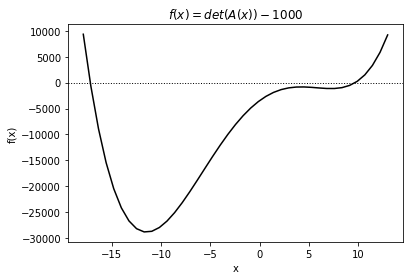

x is -17.188498 and 9.708299


In [24]:
def A(x):
    template_A = '1 2 3 {0} ; 4 5 {0} 6 ; 7 {0} 8 9 ; {0} 10 11 12'.format(x)
    _A = np.array(np.mat(template_A))
    return _A

def As(x):
    _A = None
    for _x in x:
        template_A = '1 2 3 {0} ; 4 5 {0} 6 ; 7 {0} 8 9 ; {0} 10 11 12'.format(_x)
        if _A is None:
            _A = np.array(np.mat(template_A))
        else:
            newA = np.array(np.mat(template_A))
            _A = np.concatenate((_A, newA))
    _A = np.reshape(_A, (int(_A.size / 16), 4, 4))
    return _A

# define f(x) = det(A(x)) - 1000
f = lambda x : np.linalg.det(A(x)) - 1000
fs = lambda x : np.linalg.det(As(x)) - 1000

# plot f(x)
xpts = np.linspace(-17.9, 13, 41)
ypts = fs(xpts)
myplot(xpts, ypts, '$f(x) = det(A(x)) - 1000$', ylabel = 'f(x)')

# Use bisection method to find root
root1 = scipy.optimize.bisect(f, -20, -15)
root2 = scipy.optimize.bisect(f, 5, 15)
print('x is {:>.6f} and {:>.6f}'.format(root1, root2))

---
8. The **Hilbert Matrix**  is the n × n matrix whose ijth entry is $\frac{1}{i + j - 1}$. Let $A$ denote the
5 × 5 Hilbert matrix. Its largest eigenvalue is about 1.567. Use the Bisection Method to decide
how to change the upper left entry $A_{11}$ to make the largest eigenvalue of $A$ equal to $\pi$. Determine $A_
{11}$ within six correct decimal places.

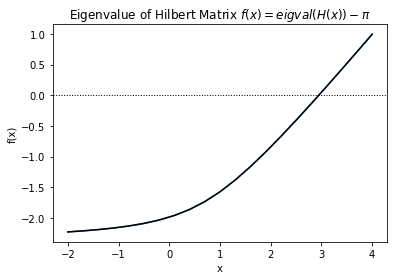

Make A[1,1] to be 2.948011 to make the largest eigenvalue equal to pi


In [25]:
def hilbert_matrix_eigvals(upper_left_element):
    hilbert_matrix = LA.hilbert(5)
    hilbert_matrix[0][0] = upper_left_element
    return LA.eigvals(hilbert_matrix)

f = lambda x : np.max(hilbert_matrix_eigvals(x)).real - scipy.pi

def fs(f, xpts):
    ypts = np.zeros(xpts.size)
    for i in range(len(xpts)):
        ypts[i] = f(xpts[i])
    return ypts

# Generate samples
xpts = np.linspace(-2, 4, 21)
ypts = fs(f, xpts)

# Plot f(x)
plt.plot(xpts,ypts)
myplot(xpts, ypts, 'Eigenvalue of Hilbert Matrix $f(x) = eigval(H(x)) - \pi$', ylabel = 'f(x)')

root = scipy.optimize.bisect(f, 2, 4)
print('Make A[1,1] to be {:>.6f} to make the largest eigenvalue equal to pi'.format(root))

---
9. Find the height reached by 1 cubic meter of water stored in a spherical tank of radius 1 meter. Give your answer ±1 mm. (Hint: First note that the sphere will be less than half full. The volume of the bottom $H$ meters of a hemisphere of radius $R$ is $\pi H^2(R - 1/3H)$.)

In [26]:
# First note implies that the range will be [0, 1]
ranges = [0, 1]

# Define f(x) = V(x, 1) - 1 where V(H, R) = pi * H^2 * (R - H / 3)
volume = lambda H, R : scipy.pi * np.power(H, 2) * (R - H / 3) 
f = lambda x : volume(x, 1) - 1

root = scipy.optimize.bisect(f, *ranges)
print('{:>.6f} m'.format(root))

0.635501 m


---
10. A planet orbiting the sun traverses an ellipse. The eccentricity $e$ of the ellipse is the distance between the center of the ellipse and either of its foci divided by the length of the semimajor axis. The perihelion is the nearest point of the orbit to the sun. *Kepler’s equation* $M = E - e\sin{E}$ relates the *eccentric anomaly* $E$, the true angular distance (in radians) from perihelion, to the *mean anomaly* $M$, the fictitious angular distance from perihelion if it were on a circular orbit with the same period as the ellipse.

(a) Assume $e = 0.1$. Use the Bisection Method to find the eccentric anomalies $E$ when $M = \pi/6$ and $M = \pi/2$. Begin by finding a starting interval and explain why it works. 

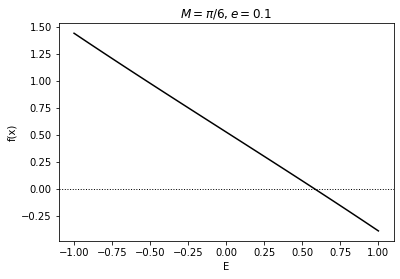

eccentric anomalies is 0.578255 while M = π/6


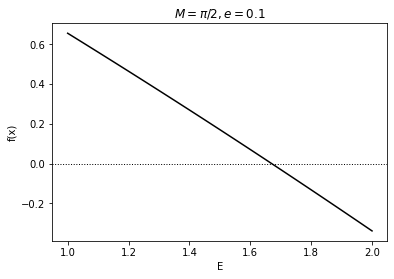

eccentric anomalies is 1.670302 while M = π/2


In [27]:
e = 0.1

# define f(x) = M - E + e * sin(E)
f = lambda E, e, M : M - E + e * np.sin(E)

# when M = π/6
M = scipy.pi / 6
xpts = np.linspace(-1, 1, 21)
ypts = f(xpts, e, M)
myplot(xpts, ypts, '$M = \pi/6, e = 0.1$', xlabel = 'E', ylabel = 'f(x)')
root = scipy.optimize.bisect(lambda x : f(x, e, M), 0.25, 0.75)
print('eccentric anomalies is {:>.6f} while M = π/6'.format(root))

# when M = π/2
M = scipy.pi / 2
xpts = np.linspace(1, 2, 21)
ypts = f(xpts, e, M)
myplot(xpts, ypts, '$M = \pi/2, e = 0.1$', xlabel = 'E', ylabel = 'f(x)')
root = scipy.optimize.bisect(lambda x : f(x, e, M), 1, 2)
print('eccentric anomalies is {:>.6f} while M = π/2'.format(root))

(b) How do the answers to (a) change if the eccentricity is changed to $e = 0.2$?

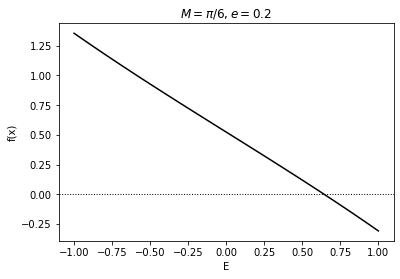

eccentric anomalies is 0.643617 while M = π/6


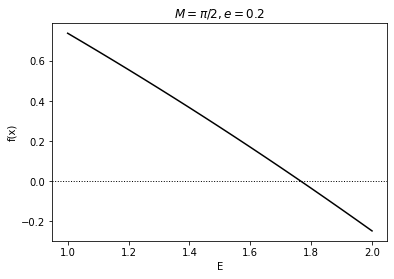

eccentric anomalies is 1.766961 while M = π/2


In [28]:
e = 0.2

# define f(x) = M - E + e * sin(E)
f = lambda E, e, M : M - E + e * np.sin(E)

# when M = π/6
M = scipy.pi / 6
xpts = np.linspace(-1, 1, 21)
ypts = f(xpts, e, M)
myplot(xpts, ypts, '$M = \pi/6, e = 0.2$', xlabel = 'E', ylabel = 'f(x)')
root = scipy.optimize.bisect(lambda x : f(x, e, M), 0.25, 0.75)
print('eccentric anomalies is {:>.6f} while M = π/6'.format(root))

# when M = π/2
M = scipy.pi / 2
xpts = np.linspace(1, 2, 21)
ypts = f(xpts, e, M)
myplot(xpts, ypts, '$M = \pi/2, e = 0.2$', xlabel = 'E', ylabel = 'f(x)')
root = scipy.optimize.bisect(lambda x : f(x, e, M), 1, 2)
print('eccentric anomalies is {:>.6f} while M = π/2'.format(root))

---
# 1.2 Fixed-Point Iteration

## DEFINITION 1.4

The real number r is a **fixed point** of the function g if $g(r) = r$.

In [29]:
def fpi(g, x0, k, tol = 0):
    """
    Computes approximate solution of g(x)=x by Fixed-Point Iteration
    
    Args:
        g (function prototype) : function handle
        x0 (real number) : starting guess 
        k (integer) : number of iteration steps
        tol (real number) : tolerance (default : 0)
        
    Returns:
        Approximate solution xc
    
    Raises:
        ValueError :
            - g is None
            - k is not the type of positive integer 
            - tol is negative
    """
    try:
        if g is None :
            raise ValueError('f is null')
        if k != int(k) :
            raise ValueError('k must be type of integer')
        if k < 0 :
            raise ValueError('k must be positive integer')
        if tol < 0 :
            raise ValueError('tol must be positive')
            
        x = x0
        for _ in range(k) :
            tx = g(x)
            if tol > 0 and abs(tx - x) / abs(tx) < tol :
                return tx
            else :
                x = tx
        
        return x
    except ValueError as e:
        print('ValueError Exception : ', e)
        traceback.print_exception()

## DEFINITION 1.5 

Let $e_i$ denote the error at step $i$ of an iterative method. If 

$$\lim_{i \rightarrow \infty} \frac{e_{i+1}}{e_i} = S < 1$$

the method is said to obey linear convergence with rate $S$.

## THEOREM 1.6

Assume that $g$ is continuously differentiable, that $g(r) = r$, and that $S = \left | {g}'(r) \right | < 1$. Then Fixed-Point Iteration converges linearly with rate $S$ to the fixed point $r$ for initial guesses sufficiently close to $r$.

## DEFINITION 1.7

An iterative method is called **locally convergent** to r if the method converges to r for initial guesses sufficiently close to r.

### Example
Use Fixed-Point Iteration to find a root of $cosx = sinx$

$x + \cos{x} - \sin{x} = x $

$\Rightarrow g(x) = x + \cos{x} - \sin{x}$ 

In [30]:
g = lambda x : x + np.cos(x) - np.sin(x)
root = scipy.optimize.fixed_point(g, 0, method='iteration')
print('{:>.8f}'.format(root))

0.78539816


### Example
Find the fixed points of $g(x)=2.8x - x^2$

In [31]:
g = lambda x : 2.8 * x - np.power(x, 2)
root = scipy.optimize.fixed_point(g, 0.1, method='iteration')
print('{:>.8f}'.format(root))

1.80000001


### Example
Calculate $\sqrt{2}$ by using **FPI**.

$x = \sqrt{2} $

$\Rightarrow x - \sqrt{2} = 0 $

$\Rightarrow x^2 - 2\sqrt{2}x + 2 = 0 $

$\Rightarrow x^2 + 2 = 2\sqrt{2}x $

$\Rightarrow g(x) = x = \sqrt{2} = \frac{x^2 + 2}{2x} $

In [32]:
g = lambda x : (np.power(x, 2) + 2) / (2 * x)
root = scipy.optimize.fixed_point(g, 2.0, method='iteration')
print('{:>.8f}'.format(root))

1.41421356


---
## 1.2 Computer Problems

1. Apply Fixed-Point Iteration to find the solution of each equation to eight correct decimal places.

(a) $ x^3 = 2x + 2 $

$ x^3 = 2x + 2 $

$\Rightarrow x = \sqrt[3]{2x + 2}$

$\Rightarrow g(x) = \sqrt[3]{2x + 2}$

In [33]:
root = scipy.optimize.fixed_point(lambda x : np.power(2 * x + 2, 1 / 3), 2.0, method='iteration')
print('{:>.8f}'.format(root))

1.76929236


(b) $ e^x + x = 7 $

$ e^x + x = 7 $

$ \Rightarrow e^x = 7 - x $

$ \Rightarrow x = \ln{7 - x} $

$ \Rightarrow g(x) = \ln{7 - x} $

In [34]:
root = scipy.optimize.fixed_point(lambda x : np.log(7 - x), 0, method='iteration')
print('{:>.8f}'.format(root))

1.67282170


(c) $ e^x + \sin{x} = 4 $

$ e^x + \sin{x} = 4 $

$ \Rightarrow e^x = 4 - \sin{x} $

$ \Rightarrow x = \ln{(4 - \sin{x})} $

$ \Rightarrow g(x) = \ln{(4 - \sin{x})} $

In [35]:
root = scipy.optimize.fixed_point(lambda x : np.log(4 - np.sin(x)), 0, method='iteration')
print('{:>.8f}'.format(root))

1.12998050


---
2. Apply Fixed-Point Iteration to find the solution of each equation to eight correct decimal places.

(a) $x^5 + x = 1$

$ x^5 + x = 1 $

$ \Rightarrow x^5 = 1 - x $

$ \Rightarrow x = \sqrt[5]{1 - x} $

$ \Rightarrow g(x) = \sqrt[5]{1 - x} $

In [36]:
root = scipy.optimize.fixed_point(lambda x : np.power(1 - x, 1 / 5), 0.1, method='iteration')
print('{:>.8f}'.format(root))

0.75487766


(b) $\sin{x} = 6x + 5$

$ \sin{x} = 6x + 5 $

$ \Rightarrow x = \frac{\sin{x} - 5}{6} $

$ \Rightarrow g(x) = \frac{\sin{x} - 5}{6} $

In [37]:
root = scipy.optimize.fixed_point(lambda x : (np.sin(x) - 5) / 6, 0.1, method='iteration')
print('{:>.8f}'.format(root))

-0.97089892


---
3. Calculate the square roots of the following numbers to eight correct decimal places by using Fixed-Point Iteration as in Example 1.6: (a) 3 (b) 5. State your initial guess and the number of steps needed.

We can conclude that $g(x, c) = x = \sqrt{c} = \frac{x^2 + c}{2x}$ from Example 1.6. Then

In [38]:
g = lambda x, c : (np.power(x, 2) + c) / (2 * x)

(a) $g(x, 3) = \frac{x^2 + 3}{2x}$

In [39]:
root = scipy.optimize.fixed_point(lambda x : g(x, 3), 0.1, method='iteration')
print('{:>.8f}'.format(root))

1.73205081


(b) $g(x, 5) = \frac{x^2 + 5}{2x}$

In [40]:
root = scipy.optimize.fixed_point(lambda x : g(x, 5), 0.1, method='iteration')
print('{:>.8f}'.format(root))

2.23606798


---
4. Calculate the cube roots of the following numbers to eight correct decimal places, by using Fixed-Point Iteration with $g(x) = (2x + A/x^2) / 3$, where A is (a) 2 (b) 3 (c) 5. State your initial guess and the number of steps needed.

Let $y^3 = x$ and $g(x, A) = (2y^3 + A/y^6)/3$

$\Rightarrow y^3 = (2y^3 + A/y^6)/3$

$\Rightarrow y = \sqrt[3]{(2y^3 + A/y^6)/3}$

$\Rightarrow h(y, A) = \sqrt[3]{(2y^3 + A/y^6)/3}$

In [41]:
h = lambda y, A : np.power((2 * np.power(y, 3) + A / np.power(y, 6)) / 3, 1 / 3)

(a) $h(y, 2) = \sqrt[3]{(2y^3 + 2/y^6)/3}$

In [42]:
root = scipy.optimize.fixed_point(lambda y : h(y, 2), 1.0, method='iteration')
print('{:>.8f}'.format(root))

1.08005974


(b) $h(y, 3) = \sqrt[3]{(2y^3 + 3/y^6)/3}$

In [43]:
root = scipy.optimize.fixed_point(lambda y : h(y, 3), 1.0, method='iteration')
print('{:>.8f}'.format(root))

1.12983096


(c) $h(y, 5) = \sqrt[3]{(2y^3 + 5/y^6)/3}$

In [44]:
root = scipy.optimize.fixed_point(lambda y : h(y, 5), 1.0, method='iteration')
print('{:>.8f}'.format(root))

1.19581317


---
5. Example 1.3 showed that $g(x) = \cos{x}$ is a convergent FPI. Is the same true for $g(x) = \cos^2{x}$? Find the fixed point to six correct decimal places, and report the number of FPI steps needed. Discuss local convergence, using Theorem 1.6.

In [45]:
root = scipy.optimize.fixed_point(lambda x : np.power(np.cos(x), 2), 1.0, method='iteration')
print('{:>.6f}'.format(root))

0.641714


In [46]:
dg = sympy.diff(sympy.cos(sympy.abc.x) ** 2)
display(dg)
S = np.abs(sympy.lambdify(sympy.abc.x, dg)(root))
print('S = {:>.6f}'.format(S))

S = 0.958993


Because $g'(x) = -2\sin{x}\cos{x}$ and $S = \left | g'(x = 0.641714) \right | = \left | -0.958993 \right | = 0.958993 < 1$. It is locally convergent.

---
6. Derive three different $g(x)$ for finding roots to six correct decimal places of the following $f(x) = 0$ by Fixed-Point Iteration. Run FPI for each $g(x)$ and report results, convergence or divergence. Each equation $f(x) = 0$ has three roots. Derive more $g(x)$ if necessary until all roots are found by FPI. For each convergent run, determine the value of S from the errors $e_{i+1}/e_{i}$ , and compare with $S$ determined from calculus as in (1.11).

(a) $f(x) = 2x^3 - 6x - 1$

(1) $6x = 2x^3 - 1$

$ \Rightarrow g(x) = x = \frac{2x^3 - 1}{6} $

In [47]:
f = lambda x : (2 * np.power(x, 3) - 1) / 6
root = scipy.optimize.fixed_point(f, 1.0, method='iteration')
print('1st root is {:>.6f}'.format(root))

dg = sympy.diff((2 * sympy.abc.x ** 3 - 1) / 6)
S = np.abs(sympy.lambdify(sympy.abc.x, dg)(root))
print('S = {:>.6f}'.format(S))

1st root is -0.168254
S = 0.028310


It is locally convergent due to S = 0.028310 < 1

(2) $ 2x^3 = 6x + 1 $

$ \Rightarrow g(x) = x = \sqrt[3]{\frac{6x + 1}{2}} $

In [48]:
f = lambda x : np.power((6 * x + 1) / 2, 1 / 3)
root = scipy.optimize.fixed_point(f, 1.0, method='iteration')
print('2nd root is {:>.6f}'.format(root))

dg = sympy.diff( ((6 * sympy.abc.x + 1) / 2) ** (1 / 3) )
S = np.abs(sympy.lambdify(sympy.abc.x, dg)(root))
print('S = {:>.6f}'.format(S))

2nd root is 1.810038
S = 0.305228


It is locally convergent due to S = 0.305228 < 1

(3) $ 2x \cdot x^2 = 6x + 1 $

$ \Rightarrow g(x) = x = \frac{\sqrt{6/x + 1/x^2}}{2} $


In [49]:
f = lambda x : np.sqrt(6 / x + 1 / np.power(x, 2)) / 2
root = scipy.optimize.fixed_point(f, 2.0, method='iteration')
print('3rd root is {:>.6f}'.format(root))

dg = sympy.diff( ((6 / sympy.abc.x + 1 / sympy.abc.x ** 2) ** 0.5) / 2 )
S = np.abs(sympy.lambdify(sympy.abc.x, dg)(root))
print('S = {:>.6f}'.format(S))

3rd root is 1.195609
S = 0.561172


It is locally convergent due to S = 0.561172 < 1

(b) $f(x) = e^{x-2} + x^3 - x$

(1) $x = e^{x-2} + x^3$

$ \Rightarrow g(x) = e^{x-2} + x^3 $

In [50]:
g = lambda x : np.exp(x - 2) + np.power(x, 3)
root = scipy.optimize.fixed_point(g, 0, method='iteration')
print('1st root is {:>.6f}'.format(root))

dg = sympy.diff(sympy.log(sympy.abc.x - 2) + sympy.abc.x ** 3)
S = np.abs(sympy.lambdify(sympy.abc.x, dg)(root))
print('S = {:>.6f}'.format(S))

1st root is 0.163822
S = 0.464096


It is locally convergent due to S = 0.464096 < 1

(2) $x^3 = x - e^{x-2} $

$ \Rightarrow x = \sqrt[3]{x - e^{x-2}} $

$ \Rightarrow g(x) = \sqrt[3]{x - e^{x-2}} $

In [51]:
g = lambda x : np.power(x - np.exp(x - 2), 1 / 3)
root = scipy.optimize.fixed_point(g, 1, method='iteration')
print('2nd root is {:>.6f}'.format(root))

dg = sympy.diff((sympy.abc.x - sympy.exp(sympy.abc.x - 2)) ** (1 / 3))
S = np.abs(sympy.lambdify(sympy.abc.x, dg)(root))
print('S = {:>.6f}'.format(S))

2nd root is 0.788941
S = 0.376010


It is locally convergent due to S = 0.376010 < 1

(3) $e^{x-2} = x - x^3$

$ \Rightarrow x - 2 = \ln{(x - x^3)} $

$ \Rightarrow g(x) = 2 + \ln{(x - x^3)} $

In [52]:
g = lambda x : np.exp(x - 2) + x ** 3 - x
print('Diverge, cannot find 3rd root by FPI')

# We use other method to find 3rd root
root = scipy.optimize.fsolve(g, -1)[0]
print('3rd root is {:>.6f}'.format(root))

dg = sympy.diff(2 + sympy.log(sympy.abc.x - sympy.abc.x ** 3))
S = np.abs(sympy.lambdify(sympy.abc.x, dg)(root))
print('S = {:>.6f}'.format(S))

Diverge, cannot find 3rd root by FPI
3rd root is -1.023482
S = 44.056711


(c) $f(x) = 1 + 5x - 6x^3 - e^{2x}$

(1) $f(x) = 1 + 5x - 6x^3 - e^{2x}$

$ \Rightarrow 5x = 6x^3 + e^{2x} - 1$

$ \Rightarrow g(x) = x = \frac{6x^3 + e^{2x} - 1}{5}$

In [53]:
g = lambda x : (6 * np.power(x, 3) + np.exp(2 * x) - 1) / 5
root = scipy.optimize.fixed_point(g, 0.5, method='iteration')
print('1st root is {:>.6f}'.format(root))

dg = sympy.diff((6 * sympy.abc.x ** 3 + sympy.exp(2 * sympy.abc.x) - 1) / 5)
S = np.abs(sympy.lambdify(sympy.abc.x, dg)(root))
print('S = {:>.6f}'.format(S))

1st root is 0.000000
S = 0.400000


It is locally convergent due to S = 0.400000 < 1

(2) $f(x) = 1 + 5x - 6x^3 - e^{2x}$

$ \Rightarrow 6x^3 = 1 + 5x - e^{2x}$

$ \Rightarrow x^3 = \frac{1 + 5x - e^{2x}}{6}$

$ \Rightarrow g(x) = x =  \sqrt[3]{\frac{1 + 5x - e^{2x}}{6}}$

In [54]:
g = lambda x : np.power((1 + 5 * x - np.exp(2 * x)) / 6, 1 / 3)
root = scipy.optimize.fixed_point(g, 0.5, method='iteration')
print('2nd root is {:>.6f}'.format(root))

dg = sympy.diff((1 + 5 * sympy.abc.x - sympy.exp(2 * sympy.abc.x)) ** (1 / 3))
S = np.abs(sympy.lambdify(sympy.abc.x, dg)(root))
print('S = {:>.6f}'.format(S))

2nd root is 0.506308
S = 0.199103


It is locally convergent due to S = 0.506308 < 1

(3) $f(x) = 1 + 5x - 6x^3 - e^{2x}$

$ \Rightarrow e^{2x} = 1 + 5x - 6x^3$

$ \Rightarrow 2x = \ln{(1 + 5x - 6x^3)}$

$ \Rightarrow g(x) = x = \frac{\ln{(1 + 5x - 6x^3)}}{2} $

In [55]:
g = lambda x : np.log(1 + 5 * x - 6 * np.power(x, 3)) / 2
print('Diverge, cannot find 3rd root by FPI')

# We use other method to find 3rd root
root = scipy.optimize.fsolve(g, -1)[0]
print('3rd root is {:>.6f}'.format(root))

dg = sympy.diff(sympy.log(1 + 5 * sympy.abc.x - 6 * sympy.abc.x ** 3) / 2)
S = np.abs(sympy.lambdify(sympy.abc.x, dg)(root))
print('S = {:>.6f}'.format(S))

Diverge, cannot find 3rd root by FPI
3rd root is -0.912871
S = 5.000000


---
# 1.3 Limits of Accuracy

### Example

Use the Bisection Method to find the root of $f(x) = x^3 - 2x^2 + \frac{4}{3}x - \frac{8}{27}$ to within six correct significant digits

In [56]:
root = scipy.optimize.bisect(lambda x : np.power(x, 3) - 2 * np.power(x, 2) + 4 / 3 * x - 8 / 27, 0, 2)
print('{:>.12f}'.format(root))

0.666664123535


## DEFINITION 1.8

Assume that $f$ is a function and that $r$ is a root, meaning that it satisfies $f(r) = 0$. Assume that $x_a$ is an approximation to $r$. For the root-finding problem, the **backward error** of the approximation $x_a$ is $\left | f(x_a) \right |$ and  the **forward error**  is $\left | r - x_a \right |$

## DEFINITION 1.9

Assume that $r$ is a root of the differentiable function $f$ ; that is, assume that $f(r) = 0$. Then if $0 = f(r) = f'(r) = f''(r) = \dots = f^{(m-1)}(r)$, but $f^{(m)}(r) \neq 0$, we say that $f$ has a **root** of **multiplicity** $m$ at $r$. We say that $f$ has a **multiple root** at $r$ if the multiplicity is greater than one. The root is called **simple** if the multiplicity is one.

### Example

The function $f(x) = sinx - x$ has  a triple root at $r = 0$. Find the forward and backward error of the approximate root $x_a = 0.001$.

$f(0) = \sin0 - 0 = 0$<br/>
$f'(0) = \cos0 - 1 = 0$<br/>
$f''(0) = -\sin0 - 0 = 0$<br/>
$f'''(0) = -\cos0 - 0 = -1$<br/>

The forward error is $\left | r - x_a \right | = 10^{-3}$<br/>
The backward error is $\left | f(x_a) \right | = \left | sin(0.001) - 0.001 \right | \approx 1.6667 \times 10^{-10}$

### Sensitivity Formula for Roots
   
Assume that $r$ is a root of $f(x)$ and $r + \Delta r$ is a root of $f(x) + \epsilon g(x)$. Then 
$$ \Delta r \approx -\frac{\epsilon g(r)}{f'(r)}$$
if $\epsilon \ll  f'(r)$

### Error Magnification Factor

$$\textbf{error magnification factor} = \frac{\text{relative forward error}}{\text{relative backward error}}$$

$$ 
\text{error magnification factor} 
= \left | \frac{\Delta{r}/r}{\epsilon{g(r)/g(r)}} \right |
= \left | \frac{-\epsilon{g(r)/(rf'(r))}}{\epsilon} \right |
= \frac{\left | g(r) \right |}{\left | rf'(r) \right |}
$$

### Additional Examples

1. Find the multiplicity of the root $r = 0$ of $f(x) = 6x - 6\sin{x} - x^3$.

$f(x) = 6x - 6\sin{(x)} - x^3, f(x = 0) = 0$

$f'(x) = -3x^2 - 6\cos{(x)} + 6, f'(x = 0) = 0$

$f''(x) = -6x + 6\sin{(x)}, f''(x = 0) = 0$

$f^{(3)}(x) = -6 + 6\cos{(x)}, f^{(3)}(x = 0) = 0$

$f^{(4)}(x) = - 6\sin{(x)}, f^{(4)}(x = 0) = 0$

$f^{(5)}(x) = - 6\cos{(x)}, f^{(5)}(x = 0) = -6$

The root at 0 has multiplicity **five**.

2. Use the MATLAB command fzero with initial guess 0.001 to approximate the root of $f(x) = 6x - 6\sin{x} - x^3$. Compute the forward and backward errors of the approximate root.

In [57]:
f = lambda x : 6 * x - 6 * np.sin(x) - np.power(x, 3)
root = scipy.optimize.fsolve(g, 0.001)[0]
print('{:>.6f}'.format(root))

0.000000


---
## 1.3 Computer Problems

1. Let $f(x) = sinx - x$.

(a) Find the multiplicity of the root r = 0.

$f(0) = \sin{0} - 0 = 0$

$f'(0) = \cos0 - 1 = 0$

$f''(0) = -\sin0 = 0$

$f'''(0) = -\cos0 = -1$

The multiplicity is 3

(b) Use initial guess x = 0.1 to locate a root. What are the forward and backward errors.

In [58]:
f = lambda x : np.sin(x) - x
root = scipy.optimize.fsolve(f, 0.1)[0]
print('forward error  = %.16f' %(np.abs(root)))
print('backward error = %.16f' %(np.abs(f(root))))

forward error  = 0.0000000213751396
backward error = 0.0000000000000000


---
2. Carry out Computer Problem 1 for $f(x) = \sin{x^3} - x^3$.

(a) Find the multiplicity of the root r = 0.

In [59]:
def derivative_f(f):
    while True:
        f = sympy.diff(f)
        yield f
    
f = sympy.sin(sympy.abc.x ** 3) - sympy.abc.x ** 3
fx = sympy.lambdify(sympy.abc.x, f)(0)
df_generator = derivative_f(f)

display(f)
display(fx)

while fx == 0:
    f = next(df_generator)
    fx = sympy.lambdify(sympy.abc.x, f)(0)
    display(f)
    display(fx)

print('multiplicity is 10')

multiplicity is 10


(b) Use initial guess x = 0.1 to locate a root. What are the forward and backward errors.

In [60]:
f = lambda x : np.sin(np.power(x, 3)) - np.power(x, 3)
root = scipy.optimize.fsolve(f, 0.1)[0]
print('forward error  = %.16f' %(np.abs(root)))
print('backward error = %.16f' %(np.abs(f(root))))

forward error  = 0.0026072710744117
backward error = 0.0000000000000000


---
3. (a) Use fzero to find the root of $f(x) = 2x\cos{x} - 2x + \sin{x^3}$ on $\left [ -0.1, 0.2 \right ]$. Report the forward and backward errors.

In [61]:
f = lambda x : 2 * x * np.cos(x) - 2 * x + np.sin(np.power(x, 3))
root = scipy.optimize.fsolve(f, 0.03)[0]
print('root = %.16f' % root)
print('forward  error : %.16f' % np.abs(root) )
print('backward error : %.16f' % np.abs(f(root)) )

root = 0.0001214090717832
forward  error : 0.0001214090717832
backward error : 0.0000000000000000


(b) Run the Bisection Method with initial interval $\left [ -0.1, 0.2 \right ]$ to find as many correct digits as possible

$f(x) = 2x\cos{x} - 2x + \sin{x^3}$

$\Rightarrow \frac{2x \cdot (\cos^2{x} - 1) + (\cos{x} + 1) \cdot \sin{x^3}}{(\cos{x} + 1)}$

$\Rightarrow \frac{-2x\sin^2{x} + (\cos{x} + 1) \cdot \sin{x^3}}{(\cos{x} + 1)}$

In [62]:
f = lambda x : (2 * x * -np.power(np.sin(x), 2) + (np.cos(x) + 1) * np.sin(np.power(x, 3))) / (np.cos(x) + 1)
root = scipy.optimize.bisect(f, -0.1, 0.2)
print('x = %.16f' % root)
print('forward  error : %.16f' % np.abs(root))
print('backward error : %.16f' % np.abs(f(root)))

x = -0.0000000238418579
forward  error : 0.0000000238418579
backward error : 0.0000000000000000


---
4. (a) Use (1.21) to approximate the root near 3 of $f(x) = (1 + \epsilon)x^3 - 3x^2 + x - 3$ for a constant $\epsilon$.

In [63]:
epsilon = 1e-6
f = lambda x : np.power(x, 3) - 3 * np.power(x, 2) + x - 3
df = lambda x : 3 * np.power(x, 2) - 6 * x + 1
g = lambda x : np.power(x, 3)
f_eps = lambda x, epsilon : f(x) + g(x) * epsilon
root = scipy.optimize.fsolve(lambda x : f_eps(x, epsilon), 3)
droot = -epsilon * g(3) / df(3)
print('x = r + Δr = %.8f' % root)
print('Δr = %.8f' % droot)
print('r = x - Δr = %.8f' % (root - droot))

x = r + Δr = 2.99999730
Δr = -0.00000270
r = x - Δr = 3.00000000


(b) Setting $\epsilon = 10^{-3}$, find the actual root and compare with part (a).

In [64]:
epsilon = 1e-3
f = lambda x : np.power(x, 3) - 3 * np.power(x, 2) + x - 3
df = lambda x : 3 * np.power(x, 2) - 6 * x + 1
g = lambda x : np.power(x, 3)
f_eps = lambda x, epsilon : f(x) + g(x) * epsilon
root = scipy.optimize.fsolve(lambda x : f_eps(x, epsilon), 3)
droot = -epsilon * g(3) / df(3)
print('x = r + Δr = %.8f' % root)
print('Δr = %.8f' % droot)
print('r = x - Δr = %.8f' % (root - droot))

x = r + Δr = 2.99730291
Δr = -0.00270000
r = x - Δr = 3.00000291


---
5. Use (1.21) to approximate the root of $f(x) = (x - 1)(x - 2)(x - 3)(x - 4) - 10^{-6}x^6$ near $r = 4$. Find the error magnification factor. Use fzero to check your approximation.

In [65]:
epsilon = -1e-6
f = lambda x : (x - 1) * (x - 2) * (x - 3) * (x - 4)
df = lambda x : 4 * np.power(x, 3) - 30 * np.power(x, 2) + 70 * x - 50
g = lambda x : np.power(x, 6)
f_eps = lambda x, epsilon : f(x) + g(x) * epsilon
root = scipy.optimize.fsolve(lambda x : f_eps(x, epsilon), 4)
droot = -epsilon * g(4) / df(4)
print('x = r + Δr = %.8f' % root)
print('Δr = %.8f' % droot)
print('r = x - Δr = %.8f' % (root - droot))
emf = np.abs(g(4)) / np.abs(4 * df(4))
print('error magnification factor = %.6f' % (emf))

x = r + Δr = 4.00068251
Δr = 0.00068267
r = x - Δr = 3.99999984
error magnification factor = 170.666667


---
6. Use the MATLAB command fzero to find the root of the Wilkinson polynomial near $x = 15$ with a relative change of $\epsilon = 2 × 10^{-15}$ in the $x^{15}$ coefficient, making the coefficient slightly more negative. Compare with the prediction made by (1.21).

In [66]:
def wilkinson(x):
    poly = 1
    for i in range(1, 21):
        poly *= (x - i)
    return poly

def dW(x):
    poly = 1
    if 1 <= x <= 20:
        for i in range(1, 21):
            poly *= (x - i) if i != x else 1
    else:
        raise ValueError('x must be netween [1, 20]')
    return poly

epsilon = 2e-15
f = lambda x : wilkinson(x)
df = lambda x : dW(x)
g = lambda x : -1672280820.0 * np.power(x, 15.0)
f_eps = lambda x, epsilon : f(x) + g(x) * epsilon
root = scipy.optimize.fsolve(lambda x : f_eps(x, epsilon), 15.0)[0]
droot = -epsilon * g(15.0) / df(15.0)
print('x = r + Δr = %.8f' % root)
print('Δr = %.8f' % droot)
print('r = x - Δr = %.8f' % (root - droot))

x = r + Δr = 14.85625953
Δr = -0.13999692
r = x - Δr = 14.99625645


---
# 1.4 Newton's Method

In [67]:
def newton_method( f, df, x0, k = 500, tol = 1e-6) :
    """
    Use Newton's method to find the root of the function
    
    Args:
        f (function prototype) : function handle
        df (function prototype) : derivative function handle
        x0 (real number) : starting guess 
        k (integer) : number of iteration steps (default : 500)
        tol (real number) : tolerance (default : 1e-6)
        
    Return:
        Approximate solution xc
        
    Raises:
        ValueError :
            - f or df is None
            - k is smaller than 0
    """
    try:
        if f is None or df is None :
            raise ValueError('Function handle f or df is Null')
        
        if k <= 0 :
            raise ValueError('Iteration k must be larger than 0')
        
        xc = x0
        for _ in range(k) :
            xt = xc - f(xc) / df(xc)
            if tol > 0 and abs(xt - xc) / abs(xc) < tol :
                return xt
            else :
                xc = xt
        return xc
    except ValueError as e :
        print('ValueError Exception : ', e)
        traceback.print_exception()   

### Example
Find the Newton's Method formula for the equation $x^3 + x - 1 = 0$.

In [68]:
f = lambda x : np.power(x, 3) + x - 1
df = lambda x : 3 * np.power(x, 2) + 1
root = scipy.optimize.newton(f, 0, df)
print('{:>.8f}'.format(root))

0.68232780


## DEFINITION 1.10

Let $e_i$ denote the error after step $i$ of an iterative method. The iteration is **quadratically convergent** if

$$
\large M = \lim_{i \rightarrow \infty}{\frac{e_{i + 1}}{e_i^2} < \infty}
$$

## THEOREM 1.11 

Let $f$ be twice continuously differentiable and $f(r) = 0$. If $f'(r) = 0$, then Newton’s Method is locally and quadratically convergent to $r$. The error $e_i$ at step $i$ satisfies

$$\large \lim_{i \rightarrow \infty}{\frac{e_{i + 1}}{e_i^2}} = M $$

where

$$\large M = \frac{f''(r)}{2f'(r)}$$.

### Example
Find the Newton's Method formula for the equation $f(x) = x^2$.

In [69]:
f = lambda x : np.power(x, 2)
df = lambda x : 2 * x
root = scipy.optimize.newton(f, 1, df)
print('{:>.8f}'.format(root))

0.00000001


## THEOREM 1.12

Assume that the $(m + 1)$-times continuously differentiable function $f$ on $[a,b]$ has a multiplicity $m$ root at $r$. Then Newton’s Method is locally convergent to $r$, and the error $e_i$ at step $i$ satisfies

$$\large \lim_{i \rightarrow \infty}{\frac{e_{i + 1}}{e_i}} = S $$

where $ S = (m - 1)/m $.

## THEOREM 1.13

If $f$ is $(m + 1)$-times continuously differentiable on $[a,b]$, which contains a root $r$ of multiplicity $m > 1$, then Modified Newton’s Method

$$
\large x_{i+1} = x_i - \frac{mf(x_i)}{f'(x_i)}
$$

converges locally and quadratically to $r$.

### Example

Apply Newton’s Method to $f(x) = 4x^4 - 6x^2 - 11/4$ with starting guess $x_0 = 1/2$.

In [70]:
try:
    f = lambda x : 4 * np.power(x, 4) - 6 * np.power(x, 2) - 11 / 4
    df = lambda x : 16 * np.power(x, 3) - 12 * x
    root = scipy.optimize.newton(f, 0.5, df)
    print('{:>.8f}'.format(root))
except RuntimeError as e:
    print(e)

Failed to converge after 50 iterations, value is 0.5.


---
## 1.4 Computer Problems

1. Each equation has one root. Use Newton’s Method to approximate the root to eight correct decimal places.

 (a) $x^3 = 2x + 2$

In [71]:
f = lambda x : np.power(x, 3) - 2 * x - 2
df = lambda x : 3 * np.power(x, 2) - 2
root = scipy.optimize.newton(f, 1, df)
print('{:>.8f}'.format(root))

1.76929235


(b) $e^x + x = 7$

In [72]:
f = lambda x : np.exp(x) + x - 7
df = lambda x : np.exp(x) + 1
root = scipy.optimize.newton(f, 1, df)
print('{:>.8f}'.format(root))

1.67282170


(c) $e^x + \sin{x} = 4$

In [73]:
f = lambda x : np.exp(x) + np.sin(x) - 4
df = lambda x : np.exp(x) + np.cos(x)
root = scipy.optimize.newton(f, 1, df)
print('{:>.8f}'.format(root))

1.12998050


---
2. Each equation has one real root. Use Newton’s Method to approximate the root to eight correct decimal places.

(a) $x^5 + x = 1$

In [74]:
f = lambda x : np.power(x, 5) + x - 1
df = lambda x : 5 * np.power(x, 4) + 1
root = scipy.optimize.newton(f, 1, df)
print('{:>.8f}'.format(root))

0.75487767


 (b) $\sin{x} = 6x + 5$

In [75]:
f = lambda x : np.sin(x) - 6 * x - 5
df = lambda x : np.cos(x) - 6
root = scipy.optimize.newton(f, 1, df)
print('{:>.8f}'.format(root))

-0.97089892


(c) $ln{x} + x^2 = 3$

In [76]:
f = lambda x : np.log(x) + np.power(x, 2) - 3
df = lambda x : 1 / x + 2 * x
root = scipy.optimize.newton(f, 1, df)
print('{:>.8f}'.format(root))

1.59214294


---
3. Apply Newton’s Method to find the only root to as much accuracy as possible, and find the root’s multiplicity. Then use Modified Newton’s Method to converge to the root quadratically. Report the forward and backward errors of the best approximation obtained from each method.

(a) $f(x) = 27x^3 + 54x^2 + 36x + 8$

In [77]:
f = lambda x : 27 * np.power(x, 3) + 54 * np.power(x, 2) + 36 * x + 8
df = lambda x : 81 * np.power(x, 2) + 108 * x + 36
root = scipy.optimize.newton(f, 1, df)
print('root = {:>.8f}'.format(root))

e_i = np.abs(scipy.optimize.newton(f, 1, df, maxiter = 10, disp = False) - root)
e_ii = np.abs(scipy.optimize.newton(f, 1, df, maxiter = 11, disp = False) - root)
print('S = {:.6f} ≈ 2/3 implies that multiplicity is 3 according to theorem 1.12'.format(e_ii / e_i))

print('forward  error : {:.8f}'.format(np.abs(- 2 / 3 - root)))
print('backward error : {:.8f}'.format(np.abs(f(root))))

root = -0.66666226
S = 0.666616 ≈ 2/3 implies that multiplicity is 3 according to theorem 1.12
forward  error : 0.00000441
backward error : 0.00000000


(b) $f(x) = 36x^4 - 12x^3 + 37x^2 - 12x + 1$

In [78]:
f = lambda x : 36 * np.power(x, 4) - 12 * np.power(x, 3) + 37 * np.power(x, 2) - 12 * x + 1
df = lambda x : 144 * np.power(x, 3) - 36 * np.power(x, 2) + 74 * x - 12
root = scipy.optimize.newton(f, 1, df)
print('root = {:>.8f}'.format(root))

e_i = np.abs(scipy.optimize.newton(f, 1, df, maxiter = 10, disp = False) - root)
e_ii = np.abs(scipy.optimize.newton(f, 1, df, maxiter = 11, disp = False) - root)
print('S = {:.6f} ≈ 1/2 implies that multiplicity is 2 according to theorem 1.12'.format(e_ii / e_i))

print('forward  error : {:.8f}'.format(np.abs(1 / 6 - root)))
print('backward error : {:.8f}'.format(np.abs(f(root))))

root = 0.16666668
S = 0.500123 ≈ 1/2 implies that multiplicity is 2 according to theorem 1.12
forward  error : 0.00000001
backward error : 0.00000000


---
4. Carry out the steps of Computer Problem 3 for

(a) $f(x) = 2e^{x-1} - x^2 - 1$

In [79]:
f = lambda x : 2 * np.exp(x - 1) - np.power(x, 2) - 1
df = lambda x : 2 * np.exp(x - 1) - 2 * x
root = scipy.optimize.newton(f, 0, df)
print('root = {:>.8f}'.format(root))

e_i = np.abs(scipy.optimize.newton(f, 0, df, maxiter = 10, disp = False) - root)
e_ii = np.abs(scipy.optimize.newton(f, 0, df, maxiter = 11, disp = False) - root)
print('S = {:.6f} ≈ 2/3 implies that multiplicity is 3'.format(e_ii / e_i))

print('forward  error : {:.8f}'.format(np.abs(1.0 - root)))
print('backward error : {:.8f}'.format(np.abs(f(root))))

root = 0.99999328
S = 0.666092 ≈ 2/3 implies that multiplicity is 3
forward  error : 0.00000672
backward error : 0.00000000


(b) $f(x) = ln(3 - x) + x - 2$

In [80]:
f = lambda x : np.log(3 - x) + x - 2
df = lambda x : 1 - 1 / (3 - x)
root = scipy.optimize.newton(f, 0, df)
print('root = {:>.8f}'.format(root))

e_i = np.abs(scipy.optimize.newton(f, 0, df, maxiter = 20, disp = False) - root)
e_ii = np.abs(scipy.optimize.newton(f, 0, df, maxiter = 21, disp = False) - root)
print('S = {:.6f} ≈ 1 / 2 implies multiplicity is 2'.format(e_ii / e_i))

print('forward  error : {:.8f}'.format(np.abs(2.0 - root)))
print('backward error : {:.8f}'.format(np.abs(f(root))))

root = 1.99999999
S = 0.494630 ≈ 1 / 2 implies multiplicity is 2
forward  error : 0.00000001
backward error : 0.00000000


---
5. A silo composed of a right circular cylinder of height $10m$ surmounted by a hemispherical dome contains $400m^3$ of volume. Find the base radius of the silo to four correct decimal places.

Assume that radius is $\textbf{r}$ and that satisfies
$\normalsize 400 = 10 \cdot (r^2\pi) + \frac{(4/3\pi r^3)}{2} = 10r^2\pi + \frac{2r^3\pi}{3}$

In [81]:
f = lambda x : 10 * np.power(x, 2) * np.pi + 2 * np.power(x, 3) * np.pi / 3 - 400
df = lambda x : 20 * x * np.pi + 2 * np.power(x, 2) * np.pi
root = scipy.optimize.newton(f, 1, df)
print('{:>.4f}'.format(root))

3.2362


---
6. A $10cm$ high cone contains $60cm^3$ of ice cream, including a hemispherical scoop on top. Find the radius of the scoop to four correct decimal places.

The formula for the volume $V$ of a cone is $\large \frac{hr^2\pi}{3}$.

Then, $\normalsize 60 = V + \frac{(4/3\pi r^3)}{2} = \frac{hr^2\pi}{3} + \frac{2\pi r^3}{3}$

In [82]:
f = lambda x : 10 * np.power(x, 2) * np.pi / 3 + 2 * np.power(x, 3) * np.pi / 3 - 60
df = lambda x : 20 * x * np.pi / 3 + 2 * np.power(x, 2) * np.pi
root = scipy.optimize.newton(f, 1, df)
print('{:>.4f}'.format(root))

2.0201


---
7. Consider the function $f(x) = e^{\sin^3{x}} + x^6 - 2x^4 - x^3 - 1$ on the interval $[-2, 2]$. Plot the function on the interval, and find all three roots to six correct decimal places. Determine which roots converge quadratically, and find the multiplicity of the roots that converge linearly.

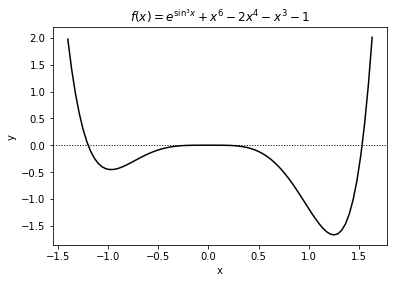

In [83]:
f = lambda x : np.exp(np.power(np.sin(x), 3)) + np.power(x, 6) - 2 * np.power(x, 4) - np.power(x, 3) - 1

df = lambda x : 3 * np.exp(np.power(np.sin(x), 3)) * np.power(np.sin(x), 2) * np.cos(x) + \
6 * np.power(x, 5) - 8 * np.power(x, 3) - 3 * np.power(x, 2)

xpts = np.linspace(-1.4, 1.63, 81)
ypts = f(xpts)

myplot(xpts, ypts, '$f(x) = e^{\sin^3{x}} + x^6 - 2x^4 - x^3 - 1$')

In [84]:
# rightmost root
root = scipy.optimize.newton(f, 1.5, df)
print('(rightmost) root = {:.6f}'.format(root))
print('converge quadratically')

(rightmost) root = 1.530134
converge quadratically


In [85]:
# leftmost root
root = scipy.optimize.newton(f, -1.5, df)
print('(leftmost) root = {:.6f}'.format(root))
print('converge quadratically')

(leftmost) root = -1.197624
converge quadratically


In [86]:
root = scipy.optimize.newton(f, 1.0, df)
e_i = np.abs(scipy.optimize.newton(f, 1.0, df, maxiter = 11, disp = False) - root)
e_ii = np.abs(scipy.optimize.newton(f, 1.0, df, maxiter = 12, disp = False) - root)
print('root = {:.6f}'.format(root))
print('converge linearly')
print('S = {:.6f} ≈ 3 / 4 implies multiplicity is 4'.format(e_ii / e_i))

root = 0.000076
converge linearly
S = 0.749796 ≈ 3 / 4 implies multiplicity is 4


---
8. Carry out the steps of Computer Problem 7 for the function
$f(x) = 94\cos^3{x} − 24\cos{x} + 177\sin^2{x} − 108\sin^4{x} − 72\cos^3{x}\sin^2{x} − 65$ on the interval $[0, 3]$

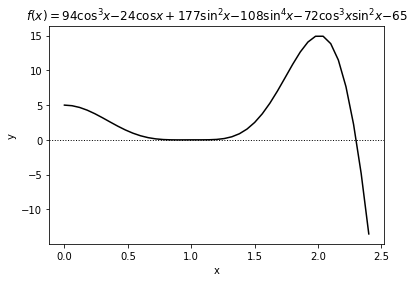

In [87]:
f = lambda x : 94 * np.power(np.cos(x), 3) - 24 * np.cos(x) + 177 * np.power(np.sin(x), 2) - 108 * np.power(np.sin(x), 4) \
- 72 * np.power(np.cos(x), 3) * np.power(np.sin(x), 2) - 65

df = lambda x : -282 * np.sin(x) * np.power(np.cos(x), 2) + 24 * np.sin(x) + 354 * np.sin(x) * np.cos(x) \
- 432 * np.power(np.sin(x), 3) * np.cos(x) + 216 * np.power(np.sin(x), 3) * np.power(np.cos(x), 2) \
- 144 * np.sin(x) * np.power(np.cos(x), 4)

xpts = np.linspace(0, 2.4, 41)
ypts = f(xpts)

myplot(xpts, ypts, '$f(x) = 94\cos^3{x} − 24\cos{x} + 177\sin^2{x} − 108\sin^4{x} − 72\cos^3{x}\sin^2{x} − 65$')

In [88]:
# rightmost root
root = scipy.optimize.newton(f, 2.2, df)
e_i = np.abs(scipy.optimize.newton(f, 2.2, df, maxiter = 4, disp = False) - root)
e_ii = np.abs(scipy.optimize.newton(f, 2.2, df, maxiter = 5, disp = False) - root)
print('(rightmost) root = {:.6f}'.format(root))
print('converge quadratically')

(rightmost) root = 2.300524
converge quadratically


In [89]:
root = scipy.optimize.newton(f, 0.9, df)
e_i = np.abs(scipy.optimize.newton(f, 0.9, df, maxiter = 10, disp = False) - root)
e_ii = np.abs(scipy.optimize.newton(f, 0.9, df, maxiter = 11, disp = False) - root)
print('root = {:.6f}'.format(root))
print('converge linearly')
print('S = {:.6f} ≈ 2/3 implies multiplicity is 3'.format(e_ii / e_i))

root = 1.047190
converge linearly
S = 0.671987 ≈ 2/3 implies multiplicity is 3


---
9. Apply Newton’s Method to find both roots of the function 
$f(x) = 14xe^{x-2} - 12e^{x-2} - 7x^3 + 20x^2 - 26x + 12$ on the interval $[0, 3]$. For each root, print out the sequence of iterates, the errors $e_i$, and the relevant error ratio $e_{i+1}/e^2_{i}$ or $e_{i+1}/e_{i}$ that converges to a
nonzero limit. Match the limit with the expected value $M$ from Theorem 1.11 or $S$ from Theorem 1.12.

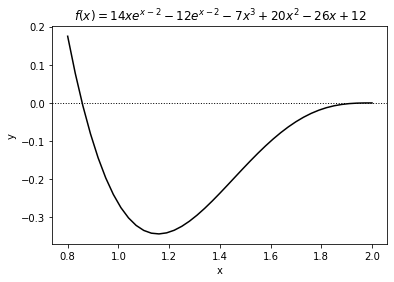

In [90]:
f = lambda x :  14 * x * np.exp(x - 2) - 12 * np.exp(x - 2) - 7 * np.power(x, 3) + 20 * np.power(x, 2) - 26 * x + 12
df = lambda x : 14 * x * np.exp(x - 2) + 2 * np.exp(x - 2) - 21 * np.power(x, 2) + 40 * x - 26

xpts = np.linspace(0.8, 2, 41)
ypts = f(xpts)

myplot(xpts, ypts, '$f(x) = 14xe^{x-2} - 12e^{x-2} - 7x^3 + 20x^2 - 26x + 12$')

In [91]:
root = scipy.optimize.newton(f, 0, df)
print('root = {:.8f}'.format(root))

e_i = np.abs(scipy.optimize.newton(f, 0, df, maxiter = 6, disp = False) - root)
e_ii = np.abs(scipy.optimize.newton(f, 0, df, maxiter = 7, disp = False) - root)
M = e_ii / np.power(e_i, 2)
print('M = {:.8f}'.format(M))

root = 0.85714286
M = 2.63683075


In [92]:
root = scipy.optimize.newton(f, 1.9, df)
print('root = {:.8f}'.format(root))

e_i = np.abs(scipy.optimize.newton(f, 1.9, df, maxiter = 8, disp = False) - root)
e_ii = np.abs(scipy.optimize.newton(f, 1.9, df, maxiter = 9, disp = False) - root)
S = e_ii / e_i
print('S = {:.8f}'.format(S))

root = 2.00000490
S = 0.66664751


---
10. Set $f(x) = 54x^6 + 45x^5 - 102x^4 - 69x^3 + 35x^2 + 16x − 4$. Plot the function on the interval $[-2, 2]$, and use Newton’s Method to find all five roots in the interval. Determine for which roots Newton converges linearly and for which the convergence is quadratic.

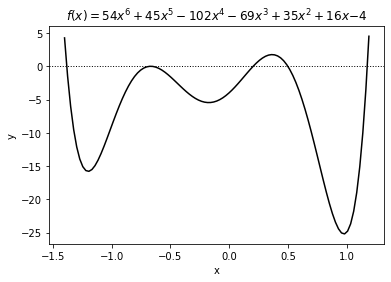

In [93]:
f = lambda x :  54 * np.power(x, 6) + 45 * np.power(x, 5) - 102 * np.power(x, 4) - 69 * np.power(x, 3) + 35 * np.power(x, 2) + 16 * x - 4
df = lambda x : 324 * np.power(x, 5) + 225 * np.power(x, 4) - 408 * np.power(x, 3) - 207 * np.power(x, 2) + 70 * x + 16

xpts = np.linspace(-1.4, 1.19, 101)
ypts = f(xpts)

myplot(xpts, ypts, '$f(x) = 54x^6 + 45x^5 - 102x^4 - 69x^3 + 35x^2 + 16x − 4$')

In [94]:
root = scipy.optimize.newton(f, -1.5, df)
print('root = {:.8f}'.format(root))
print('converge quadratically')

root = -1.38129848
converge quadratically


In [95]:
root = scipy.optimize.newton(f, -0.8, df)
print('root = {:.8f}'.format(root))
print('converge linearly')

root = -0.66666668
converge linearly


In [96]:
root = scipy.optimize.newton(f, 0, df)
print('root = {:.8f}'.format(root))
print('converge quadratically')

root = 0.20518292
converge quadratically


In [97]:
root = scipy.optimize.newton(f, 0.6, df)
print('root = {:.8f}'.format(root))
print('converge quadratically')

root = 0.50000000
converge quadratically


In [98]:
root = scipy.optimize.newton(f, 1.1, df)
print('root = {:.8f}'.format(root))
print('converge quadratically')

root = 1.17611556
converge quadratically


---
11. The ideal gas law for a gas at low temperature and pressure is $PV = nRT$, where $P$ is pressure (in atm), $V$ is volume (in $L$), $T$ is temperature (in $K$), n is the number of moles of the gas, and $R = 0.0820578$ is the molar gas constant. The van der Waals equation

$ \large \left ( P + \frac{n^2a}{V^2} \right ) (V - nb) = nRT $

covers the nonideal case where these assumptions do not hold. Use the ideal gas law to compute an initial guess, followed by Newton’s Method applied to the van der Waals equation to find the volume of one mole of oxygen at $320 K$ and a pressure of 15 atm. For oxygen, $a = 1.36 L^2-atm/mole^2$ and $b = 0.003183 L/mole$. State your initial guess and solution with three significant digits.

In [99]:
vanderWaals = lambda P, V, T, R, n, a, b : (P + np.power(n, 2) * a / np.power(V, 2)) * (V - n * b) - n * R * T
dvanderWaals = lambda P, V, n, a, b : P + a * np.power(n, 2) / np.power(V, 2) - 2 * a * np.power(n, 2) * (V - b * n) / np.power(V, 3)
f = lambda x : vanderWaals(P = 15.0, V = x, T = 320.0, R = 0.0820578, n = 1.0, a = 1.36, b = 0.003183)
df = lambda x : dvanderWaals(P = 15.0, V = x, n = 1.0, a = 1.36, b = 0.003183)
V0 = 1 * 0.0820578 * 320.0 / 15.0

root = scipy.optimize.newton(f, V0, df)
print('V0 = {:.3f}, V = {:.3f}'.format(V0, root))

V0 = 1.751, V = 1.701


---
12.  Use the data from Computer Problem 11 to find the volume of 1 mole of benzene vapor at 700 $K$ under a pressure of 20 atm. For benzene, $a = 18.0 L^2-atm/mole^2$ and $b = 0.1154 L/mole$.

In [100]:
f = lambda x : vanderWaals(P = 20.0, V = x, T = 700.0, R = 0.0820578, n = 1.0, a = 18.0, b = 0.1154)
df = lambda x : dvanderWaals(P = 20.0, V = x, n = 1.0, a = 18.0, b = 0.1154)
V0 = 1 * 0.0820578 * 700.0 / 20.0

root = scipy.optimize.newton(f, V0, df)
print('V0 = {:.3f}, V = {:.3f}'.format(V0, root))

V0 = 2.872, V = 2.664


---
13. (a) Find the root of the function $f(x) = (1 - 3 / (4x))^{1/3}$.

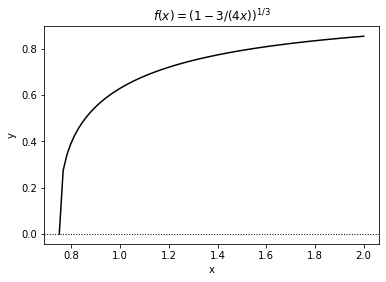

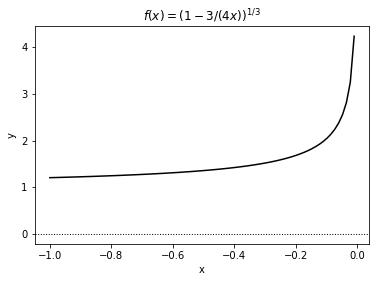

root = 0.75000000


In [101]:
f = lambda x : np.power(1 - 3 / (4 * x), 1 / 3)

xpts = np.linspace(0.75, 2, 80)
ypts = f(xpts)

myplot(xpts, ypts, '$f(x) = (1 - 3 / (4x))^{1/3}$')

xpts = np.linspace(-1, -1e-2, 80)
ypts = f(xpts)

myplot(xpts, ypts, '$f(x) = (1 - 3 / (4x))^{1/3}$')

print('root = {:.8f}'.format(3 / 4))

(b) Apply Newton’s Method using an initial guess near the root, and plot the first 50 iterates.

In [102]:
f = lambda x : np.power(1 - 3 / (4 * x), 1 / 3)
df = lambda x : 1 / (4 * np.power(x, 2) * np.power(1 - 3 / (4 * x), 2 / 3))
root = scipy.optimize.newton(f, 1.0, df)
print('root = {:.8f}'.format(3 / 4))

root = 0.75000000


(c) Why are Theorems 1.11 and 1.12 not applicable?

$f(x)$ is not differentiable in $[0, 0.75]$

---
14. (a) Fix real numbers $a,b > 0$ and plot the graph of $f(x) = a^2x^4 - 6abx^2 - 11b^2$ for your chosen values. Do not use $a = 2,b = 1/2$, since that case already appears in Example 1.15.

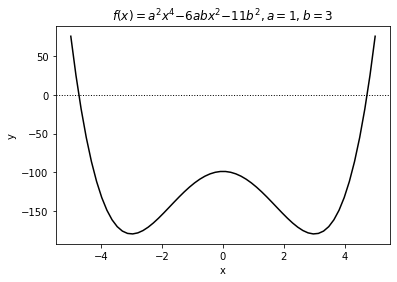

In [103]:
f = lambda x, a, b : np.power(a, 2) * np.power(x, 4) - 6 * a * b * np.power(x, 2) - 11 * np.power(b, 2)
df = lambda x, a, b : 4 * np.power(a, 2) * np.power(x, 3) - 12 * a * b * x
xpts = np.linspace(-5, 5, 60)
ypts = f(xpts, a = 1, b = 3)
myplot(xpts, ypts, '$f(x) = a^2x^4 − 6abx^2 − 11b^2, a = 1, b = 3$')

(b) Apply Newton’s Method to find both the negative root and the positive root of $f(x)$. Then find intervals of positive initial guesses $[d1, d2]$, where $d2 > d1$, for which Newton’s Method: (c) converges to the positive root, (d) converges to the negative root, (e) is defined, but does not converge to any root. Your intervals should not contain any initial guess where $f'(x) = 0$, at which Newton’s Method is not defined.

In [104]:
root = scipy.optimize.newton(lambda x : f(x, a = 1, b = 3), 4, lambda x : df(x, a = 1, b = 3))
print('[positive] root = {:.8f}'.format(root))

[positive] root = 4.73459691


In [105]:
root = scipy.optimize.newton(lambda x : f(x, a = 1, b = 3), -4, lambda x : df(x, a = 1, b = 3))
print('[negative] root = {:.8f}'.format(root))

[negative] root = -4.73459691


---
15. Solve Computer Problem 1.1.9 using Newton’s Method.

In [106]:
f = lambda x : scipy.pi * np.power(x, 2) * (1 - x / 3) - 1
df = lambda x : -scipy.pi * np.power(x, 2) / 3 + 2 * scipy.pi * x * (1 - x / 3)

root = scipy.optimize.newton(f, 1.0, df)
print('{:>.6f} m'.format(root))

0.635501 m


---
16. Solve Computer Problem 1.1.10 using Newton’s Method.

Skip

---
17. Consider the national population growth model $P(t) = (P(0) + \frac{m}{r})e^{rt} - \frac{m}{r}$, where m and r are the immigration rate and intrinsic growth rate, respectively, and time t is measured in years.

(a) From 1990 to 2000, the U.S. population increased from 248.7 million to 281.4 million, and the immigration rate was $m = 0.977$ million per year. Use Newton’s Method to find the intrinsic growth rate r during the decade, according to the model.

$f(x) = 32.7 + \frac{0.977}{r}(1 - e^{10r})$

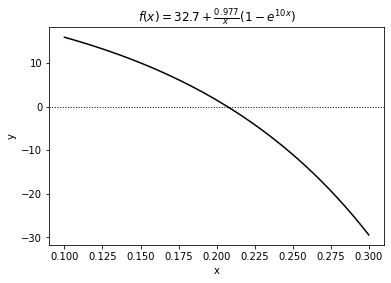

r = 0.20707480


In [107]:
f = lambda x : 32.7 + 0.977 / x * (1 - np.exp(10 * x))
df = lambda x : -9.77 * np.exp(10 * x) / x - 0.977 * (1 - np.exp(10 * x)) / np.power(x, 2)

xpts = np.linspace(0.1, 0.3, 40)
ypts = f(xpts)
myplot(xpts, ypts, r'$f(x) = 32.7 + \frac{0.977}{x}(1 - e^{10x})$')

root = scipy.optimize.newton(f, 0.2, df)
print('r = {:>.8f}'.format(root))

(b) The immigration rate from 2000 to 2010 was $m = 1.030$ million per year, and the population in 2010 was 308.7 million. Find the intrinsic growth rate r during the 2000–2010 decade.

$f(x) = 27.3 + \frac{1.030}{r}(1 - e^{10r})$

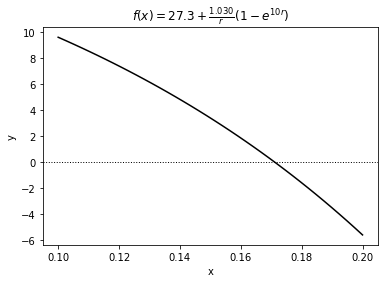

r = 0.17111690


In [108]:
f = lambda x : 27.3 + 1.03 / x * (1 - np.exp(10 * x))
df = lambda x : -10.3 * np.exp(10 * x) / x - 1.03 * (1 - np.exp(10 * x)) / np.power(x, 2)

xpts = np.linspace(0.1, 0.2, 40)
ypts = f(xpts)
myplot(xpts, ypts, r'$f(x) = 27.3 + \frac{1.030}{r}(1 - e^{10r})$')

root = scipy.optimize.newton(f, 0.2, df)
print('r = {:>.8f}'.format(root))

---
18. A crucial quantity in pipeline design is the pressure drop due to friction under turbulent flow. The pressure drop per unit length is described by the $\textit{Darcy number} f$, a unitless quantity that satisfies the empirical $\textit{Colebrook equation}$

$$
\large \frac{1}{\sqrt{f}} = -2\log_{10}{\left [ \frac{\epsilon}{3.7D} + \frac{2.51}{R\sqrt{f}} \right ]}
$$

where $D$ is the inside pipe diameter, $\epsilon$ is the roughness height of the pipe interior, and $R$ is the Reynolds number of the flow. (Flows in pipes are considered turbulent when $R > 4000$ or so.)

(a) For $D = 0.3 m$, $\epsilon = 0.0002m$, and $R = 105$, use Newton’s Method to calculate the Darcy number $f$. 

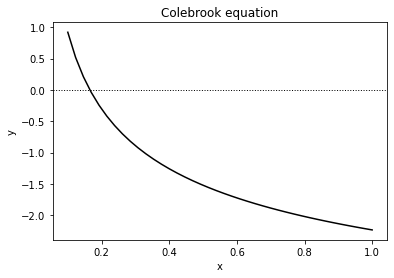

f = 0.16539433


In [109]:
colebrook = lambda f, epsilon, D, R : 1 / np.sqrt(f) + 2 * np.log10(epsilon / (3.7 * D) + 2.51 / (R * np.sqrt(f)))
dcolebrook = lambda f, epsilon, D, R : -1 / (2 * np.power(f, 1.5)) - 2.51 / (R * np.power(f, 1.5) * (epsilon / (3.7 * D) + 2.51 / (R * np.sqrt(f))) *  np.log(10))

xpts = np.linspace(0.1, 1, 40)
ypts = colebrook(xpts, 0.0002, 0.3, 105)
myplot(xpts, ypts, 'Colebrook equation')

root = scipy.optimize.newton(lambda f : colebrook(f, 0.0002, 0.3, 105), 0.15, lambda f : dcolebrook(f, 0.0002, 0.3, 105))
print('f = {:>.8f}'.format(root))

(b) Fix $D$ and $\epsilon$ as in (a), and calculate the Darcy number for several Reynolds numbers $R$ between $10^4$ and $10^8$. Make a plot of the Darcy number versus Reynolds number, using a log axis for the latter.

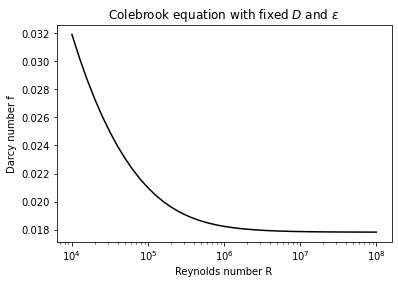

In [110]:
Rs = np.array(np.power(10, np.linspace(4, 8, 41)))
Fs = np.array([])
for R in Rs:
    Fs = np.append(Fs, scipy.optimize.newton(lambda f : colebrook(f, 0.0002, 0.3, R), 1e-3, lambda f : dcolebrook(f, 0.0002, 0.3, R)))

plt.plot(Rs, Fs, color='black')
plt.xlabel('Reynolds number R')
plt.ylabel('Darcy number f')
plt.xscale('log')
plt.title('Colebrook equation with fixed $D$ and $\epsilon$')
plt.show()
plt.close()

---
# 1.5 Root-Finding Without Derivatives

In [111]:
def secant_method(f, x0, x1, k=500) :
    """
    Use Secant's method to find the root of the formula
    
    Args:
        f (function prototype) : function handle
        x0 (real number) : initial guess
        x1 (real number) : initial guess 
        k (integer) : number of iteration steps (default : 500)
        
    Return:
        Approximate solution xc
        
    Raises:
    
    """
    x = np.zeros(k)
    x[0] = x0
    x[1] = x1
    for i in range(1, k - 1):
        if f(x[i]) - f(x[i - 1]) == 0 :
            return x[i]
        x[i + 1] = x[i] - f(x[i]) * (x[i] - x[i - 1])  / (f(x[i]) - f(x[i - 1]))
        
    return x[k - 1]

### Example 
Apply the Secant Method with starting guesses $x_0 = 0,x_1 = 1$ to find the root of $f(x)=x^3 + x + 1$

In [112]:
f = lambda x : np.power(x, 3) + x - 1

# No fprime to use secant method instead
root = scipy.optimize.newton(f, 0)
print('r = {:>.8f}'.format(root))

r = 0.68232780


In [113]:
def false_position_method(f, a, b, max_iter = 500, tol = 1e-8) :
    """
    Use false position method to find the root of the formula f
    
    Args:
        f (function prototype) : function handle
        a (real number) : the lowerbound of the bracket of initial guess
        b (real number) : the upperbound of the bracket of initial guess
        max_iter (integer) : number of iteration steps (default : 500)
        tol (real number) : tolerance
        
    Return:
        Approximate solution xc
        
    Raises:
        ValueError:
            - f(a) * f(b) must be smaller than 0 (exclude zero)
        
    """
    if f(a) * f(b) >= 0 :
        raise ValueError('f(a) * f(b) must be < 0')
    for _ in range(max_iter) :
        _tol = 0
        c = (b * f(a) - a * f(b)) / (f(a) - f(b))
        if f(c) == 0 :
            return c
        if f(a) * f(c) < 0 :
            _tol = np.abs(b - c)
            b = c
        else :
            _tol = np.abs(a - c)
            a = c
        if _tol <= tol:
            break
    return c

### Example
Apply the Method of False Position on interval $[-1,1]$ to find the root $r = 0$ of $f(x) = x^3 - 2x^2 + \frac{3}{2}x$

In [114]:
f = lambda x : np.power(x, 3) - 2 * np.power(x, 2) + 1.5 * x
false_position_method(f, -1, 1)

In [115]:
def inverse_quadratic_interpolation(f, x0, x1, x2, k):
    a = x0
    b = x1
    c = x2
    for _ in range(k) :
        q = f(a) / f(b)
        r = f(c) / f(b)
        s = f(c) / f(a)
        
        denominator = (q - 1) * (r - 1) * (s - 1)
        if denominator == 0 :
            break
        
        tmp = c - (r * (r - q) * (c - b) + (1 - r) * s * (c - a)) / denominator
        a = b
        b = c
        c = tmp
        
        
    return c

### Additional Examples

1. Apply two steps of the Secant Method on the interval with initial guesses $x_0 = 1$ and $x_1 = 2$ to ﬁnd the approximate root of $f(x) = 2x^3 - x - 7$.

In [116]:
root = scipy.optimize.newton(lambda x : 2 * np.power(x, 3) - x - 7, 1)
print('r = {:>.8f}'.format(root))

r = 1.62788925


2. Write a MATLAB program that uses the Secant Method to ﬁnd both roots of $f(x) = 8x^6 - 12x^5 + 6x^4 - 17x^3 + 24x^2 - 12x + 2$. Is the Secant Method superlinearly convergent to both roots?

In [117]:
f = lambda x : 8 * np.power(x, 6) - 12 * np.power(x, 5) + 6 * np.power(x, 4) - 17 * np.power(x, 3) + 24 * np.power(x, 2) - 12 * x + 2

root = scipy.optimize.newton(f, 0.5)
print('r1 = {:>.8f}'.format(root))

root = scipy.optimize.newton(f, 1.5)
print('r2 = {:>.8f}'.format(root))

r1 = 0.50000000
r2 = 1.25992105


---
## 1.5 Computer Problems

1. Use the Secant Method to ﬁnd the (single) solution of each equation in Exercise 1.

- Initial guesses $x_0 = 1$ and $x_1 = 2$.

(a) $x^3 = 2x + 2$

In [118]:
f = lambda x : np.power(x, 3) - 2 * x - 2
root = scipy.optimize.newton(f, 1)
print('{:>.8f}'.format(root))

1.76929235


(b) $e^x + x = 7$

In [119]:
f = lambda x : np.exp(x) + x - 7
root = scipy.optimize.newton(f, 1)
print('{:>.8f}'.format(root))

1.67282170


(c) $e^x + sin(x) = 4$

In [120]:
f = lambda x : np.exp(x) + np.sin(x) - 4
root = scipy.optimize.newton(f, 1)
print('{:>.8f}'.format(root))

1.12998050


---
2.  Apply two steps of the Method of False Position with initial bracket $[1, 2]$ to the equations of Exercise 1.

(a) $x^3 = 2x + 2$

In [121]:
f = lambda x : np.power(x, 3) - 2 * x - 2
root = false_position_method(f, 1, 2)
print('{:>.8f}'.format(root))

1.76929235


(b) $e^x + x = 7$

In [122]:
f = lambda x : np.exp(x) + x - 7
root = false_position_method(f, 1, 2)
print('{:>.8f}'.format(root))

1.67282170


(c) $e^x + sin(x) = 4$

In [123]:
f = lambda x : np.exp(x) + np.sin(x) - 4
root = false_position_method(f, 1, 2)
print('{:>.8f}'.format(root))

1.12998050


---
3. Use Inverse Quadratic Interpolation to ﬁnd the solution of each equation in Exercise 1.

Here we use Brent’s method instead.

(a) $x^3 = 2x + 2$

In [124]:
f = lambda x : np.power(x, 3) - 2 * x - 2
root = scipy.optimize.brentq(f, 1, 2)
print('{:>.8f}'.format(root))

1.76929235


(b) $e^x + x = 7$

In [125]:
f = lambda x : np.exp(x) + x - 7
root = scipy.optimize.brentq(f, 1, 2)
print('{:>.8f}'.format(root))

1.67282170


(c) $e^x + sin(x) = 4$

In [126]:
f = lambda x : np.exp(x) + np.sin(x) - 4
root = scipy.optimize.brentq(f, 1, 2)
print('{:>.8f}'.format(root))

1.12998050


---
4. Set $f(x) = 54x^6 + 45x^5 - 102x^4 - 69x^3 + 35x^2 + 16x - 4$. Plot the function on the interval $[-2,2]$, and use the Secant Method to ﬁnd all ﬁve roots in the interval. To which of the roots is the convergence linear, and to which is it superlinear?

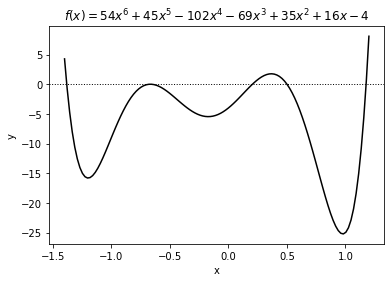

In [127]:
f = lambda x : 54 * np.power(x, 6) + 45 * np.power(x, 5) - 102 * np.power(x, 4) - 69 * np.power(x, 3) + 35 * np.power(x, 2) + 16 * x - 4

xpts = np.linspace(-1.4, 1.2, 120)
ypts = f(xpts)
myplot(xpts, ypts, r'$f(x) = 54x^6 + 45x^5 - 102x^4 - 69x^3 + 35x^2 + 16x - 4$')

In [128]:
root = scipy.optimize.newton(f, -1.5)
print('{:>.8f}'.format(root))

root = scipy.optimize.newton(f, -0.8)
print('{:>.8f}'.format(root))

root = scipy.optimize.newton(f, 0.1)
print('{:>.8f}'.format(root))

root = scipy.optimize.newton(f, 0.4)
print('{:>.8f}'.format(root))

root = scipy.optimize.newton(f, 1.2)
print('{:>.8f}'.format(root))

-1.38129848
-0.66666668
0.20518292
0.50000000
1.17611556


---
5. In Exercise 1.1.6, you were asked what the outcome of the Bisection Method would be for $f(x) = 1/x$ on the interval $[−2,1]$. Now compare that result with applying **fzero** to the problem.

In python, we use **scipy.optimize.fsolve** to represent **fzero** instead.

In [129]:
root = scipy.optimize.fsolve(lambda x : 1 / x, -1.5)[0]
print('{:>.8e}'.format(root))

-2.64035519e+83


c:\users\jim\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


---
6. What happens if **fzero** is asked to ﬁnd the root of $f(x) = x^2$ near 1 (do not use a bracketing interval)? Explain the result.

In [130]:
root = scipy.optimize.fsolve(lambda x : np.power(x, 2), 1)[0]
print('{:>.8f}'.format(root))

0.00000000


(b) Apply the same question to $f(x) = 1 + \cos{x}$ near -1.

In [131]:
root = scipy.optimize.fsolve(lambda x : 1 + np.cos(x), -1)[0]
print('{:>.8f}'.format(root))

-3.14159264


---
## MIT License

Copyright (c) 2020-2021 Jim00000

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.